In [1]:
# train_model.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import joblib
import matplotlib.pyplot as plt
import numpy as np

from format_data import create_dataframe
from preprocess import preprocess_supervised, OutputColumn

In [2]:
def split_target_from_dataset(Db, target='output'):  # Remove target col
    y = Db[target]
    X = Db.drop(columns=[target])
    return X, y


def save_model(pipeline, model_filepath):
    joblib.dump(pipeline, model_filepath)

In [3]:
model_file_path = 'models/random_forest_model.pkl'
target = OutputColumn.yield_strength

print("Loading the dataset")
Db = create_dataframe()
print("Preprocessing")
Db = preprocess_supervised(Db, target)

print("Split target from the dataset")
X, y = split_target_from_dataset(Db)

X.shape

Loading the dataset
Preprocessing
We retain only the rows with output values Yield strength / MPa, that is 47.215496% of the dataset
Split target from the dataset


(780, 21)

[50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500]
n_estimators = 50
OOB Score (R^2): 0.6440061010545428
n_estimators = 55
OOB Score (R^2): 0.6463810400860364
n_estimators = 60
OOB Score (R^2): 0.6468755535171651
n_estimators = 65
OOB Score (R^2): 0.6489700695624858
n_estimators = 70
OOB Score (R^2): 0.6465196585155102
n_estimators = 75
OOB Score (R^2): 0.6467493340001786
n_estimators = 80
OOB Score (R^2): 0.6484137898129367
n_estimators = 85
OOB Score (R^2): 0.6496803162895433
n_estimators = 90
OOB Score (R^2): 0.647949524358094
n_estimators = 95
OOB Score (R^2): 0.6472863976898371
n_estimators = 

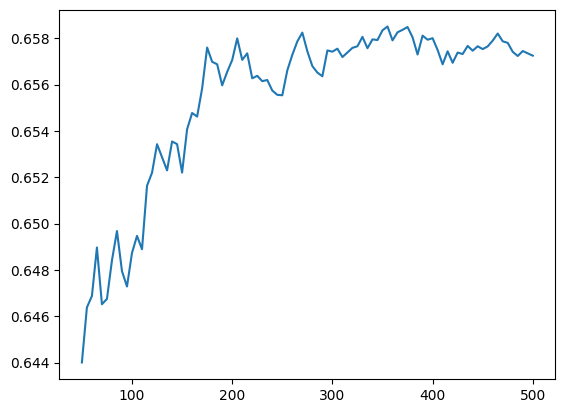

In [12]:
n_estimators=[50 +5*i for i in range(91)]
print(n_estimators)
oob_scores_list=[]

for n_est in n_estimators:
    print(f"n_estimators = {n_est}")
    pipeline = Pipeline(steps=[
        ('model', RandomForestRegressor(
            n_estimators=n_est,
            oob_score=True,       # Enable OOB score
            random_state=17,
            bootstrap=True        # Bootstrap sampling required for OOB
        ))
    ])


    pipeline.fit(X, y)

    rf_model = pipeline.named_steps['model']

    # OOB R^2 score
    oob_score = rf_model.oob_score_
    print(f"OOB Score (R^2): {oob_score}")
    oob_scores_list.append(oob_score)

plt.plot(n_estimators,oob_scores_list)


[100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300]
n_estimators = 100
n_estimators = 105
n_estimators = 110
n_estimators = 115
n_estimators = 120
n_estimators = 125
n_estimators = 130
n_estimators = 135
n_estimators = 140
n_estimators = 145
n_estimators = 150
n_estimators = 155
n_estimators = 160
n_estimators = 165
n_estimators = 170
n_estimators = 175
n_estimators = 180
n_estimators = 185
n_estimators = 190
n_estimators = 195
n_estimators = 200
n_estimators = 205
n_estimators = 210
n_estimators = 215
n_estimators = 220
n_estimators = 225
n_estimators = 230
n_estimators = 235
n_estimators = 240
n_estimators = 245
n_estimators = 250
n_estimators = 255
n_estimators = 260
n_estimators = 265
n_estimators = 270
n_estimators = 275
n_estimators = 280
n_estimators = 285
n_estimators = 290
n_estimators = 295
n_estimators = 300


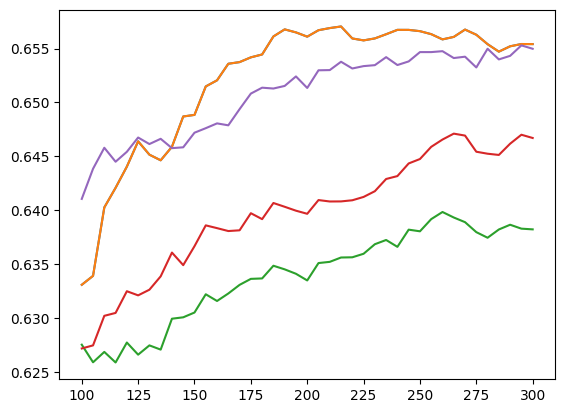

In [6]:
n_estimators=[100 +5*i for i in range(41)]
print(n_estimators)
oob_scores={"all": [], "sqrt" : [], "log2" : [], "half" : [], "third" : []}

for n_est in n_estimators:
    print(f"n_estimators = {n_est}")
    pipeline_sqrt = Pipeline(steps=[
        ('model', RandomForestRegressor(
            n_estimators=n_est,
            oob_score=True,       # Enable OOB score
            random_state=17,
            bootstrap=True,
            max_features= 'sqrt'      # Bootstrap sampling required for OOB
        ))
    ])
    pipeline_log2 = Pipeline(steps=[
        ('model', RandomForestRegressor(
            n_estimators=n_est,
            oob_score=True,
            random_state=17,
            bootstrap=True,
            max_features='log2'
        ))
    ])

    pipeline_all = Pipeline(steps=[
        ('model', RandomForestRegressor(
            n_estimators=n_est,
            oob_score=True,
            random_state=17,
            bootstrap=True,
        ))
    ])

    pipeline_half = Pipeline(steps=[
        ('model', RandomForestRegressor(
            n_estimators=n_est,
            oob_score=True,
            random_state=17,
            bootstrap=True,
            max_features=10
        ))
    ])

    pipeline_third = Pipeline(steps=[
        ('model', RandomForestRegressor(
            n_estimators=n_est,
            oob_score=True,
            random_state=17,
            bootstrap=True,
            max_features=7
        ))
    ])


    pipeline_sqrt.fit(X, y)
    pipeline_log2.fit(X, y)
    pipeline_all.fit(X, y)
    pipeline_half.fit(X, y)
    pipeline_third.fit(X, y)

    rf_model_sqrt = pipeline_sqrt.named_steps['model']
    rf_model_log2 = pipeline_log2.named_steps['model']
    rf_model_all = pipeline_all.named_steps['model']
    rf_model_half = pipeline_half.named_steps['model']
    rf_model_third = pipeline_third.named_steps['model']

    oob_scores['sqrt'].append(rf_model_sqrt.oob_score_)
    oob_scores['log2'].append(rf_model_log2.oob_score_)
    oob_scores['all'].append(rf_model_all.oob_score_)
    oob_scores['half'].append(rf_model_half.oob_score_)
    oob_scores['third'].append(rf_model_third.oob_score_)

plt.plot(n_estimators,oob_scores['sqrt'])
plt.plot(n_estimators,oob_scores['log2'])
plt.plot(n_estimators,oob_scores['all'])
plt.plot(n_estimators,oob_scores['half'])
plt.plot(n_estimators,oob_scores['third'])

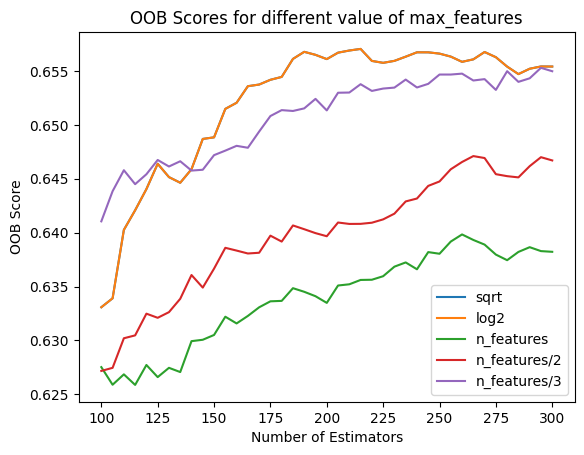

In [8]:
plt.plot(n_estimators, oob_scores['sqrt'], label='sqrt')
plt.plot(n_estimators, oob_scores['log2'], label='log2')
plt.plot(n_estimators, oob_scores['all'], label='n_features')
plt.plot(n_estimators, oob_scores['half'], label='n_features/2')
plt.plot(n_estimators, oob_scores['third'], label='n_features/3')

# Add a legend
plt.legend()

# Optionally, you can add labels and a title for clarity
plt.xlabel('Number of Estimators')
plt.ylabel('OOB Score')
plt.title('OOB Scores for different value of max_features')
plt.show()

In [5]:
random_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
    'max_features': ['log2', None, 'sqrt', 10, 7],
}

# Number of iterations for the random search
n_iter_search = 400

# Define a list to store results
best_params = None
best_oob_score = -1

output = {}
# Random Search Loop
for i in range(n_iter_search):
    # Randomly sample hyperparameters
    params = {key: np.random.choice(values) for key, values in random_grid.items()}

    # Train the RandomForest with OOB score enabled
    model = RandomForestRegressor(oob_score=True, random_state=42, **params)
    model.fit(X, y)  # Use your dataset here

    # Check the OOB score
    oob_score = model.oob_score_

    print(f"Iteration {i}: {oob_score}")

    output[oob_score] = best_params
    # Update if current model is better
    if oob_score > best_oob_score:
        best_oob_score = oob_score
        best_params = params

print("Best OOB Score:", best_oob_score)
print("Best Hyperparameters:", best_params)

keys = sorted(output.keys())
top_5_percent_keys = keys[int(0.95 * len(keys)):]
print("\nTop 5%:")
for score in top_5_percent_keys:
    print(f"OOB score: {score}    Best params: {output[score]}")

Iteration 0: 0.6431329026257848
Iteration 1: 0.6132848591938204
Iteration 2: 0.6065450612944523
Iteration 3: 0.5795251626706572
Iteration 4: 0.6270493932396466
Iteration 5: 0.6105918831682735
Iteration 6: 0.6229854386672748
Iteration 7: 0.6105918831682735
Iteration 8: 0.6232815300262361
Iteration 9: 0.58405473370014
Iteration 10: 0.6233679044635954
Iteration 11: 0.6423742126818057
Iteration 12: 0.5798840654097607
Iteration 13: 0.6051771869217594
Iteration 14: 0.5976472087739749
Iteration 15: 0.6362094964603041
Iteration 16: 0.6377054820538042
Iteration 17: 0.6268170686908116
Iteration 18: 0.626610017158801
Iteration 19: 0.637293529800947
Iteration 20: 0.6458867868956407
Iteration 21: 0.6432652102956781
Iteration 22: 0.6357385726397495
Iteration 23: 0.6101036023901607
Iteration 24: 0.6278457772020268
Iteration 25: 0.641601508220077
Iteration 26: 0.5812865270384766
Iteration 27: 0.6231563519492789
Iteration 28: 0.6423571381827576
Iteration 29: 0.6430029112821943
Iteration 30: 0.612231127

In [4]:
keys = sorted(output.keys())
top_10_percent_keys = keys[int(0.9 * len(keys)):]
print("\nTop 10%:")
for score in top_10_percent_keys:
    print(f"OOB score: {score}    Best params: {output[score]}")

NameError: name 'output' is not defined

100 0.6347680728857263
120 0.6356211951920545
140 0.6396241881938642
160 0.6422321483245489
180 0.6416182562056726
200 0.6422981826952489
220 0.6414120992191659
240 0.6422989911972965
260 0.6420189673109271
280 0.6439044574218875
300 0.6452639789727281
320 0.644581246658227
340 0.6434054765921777
360 0.6433140567412075
380 0.6435579881784275
400 0.6449904595396344
420 0.6453724946316044
440 0.6463853479683386
460 0.6465063541078787
480 0.6463917911622923
500 0.6468329916178557
520 0.6477146725749067
540 0.6477878224634528
560 0.6489240337071451
580 0.6489026174120642
600 0.6499649505808027
620 0.649401710841141
640 0.6493830094696298
660 0.649655183719624
680 0.6497226228831517
700 0.6500018011005162
720 0.6505521343457156
740 0.6497400063655352
760 0.6500616614087236
780 0.6501678929674237
800 0.650129278183719
820 0.6505088235291598
840 0.6509118366875009
860 0.6513368535085259
880 0.6511015236965327
900 0.6515975912219645
920 0.6515888760906989
940 0.651293919181674
960 0.6509088267

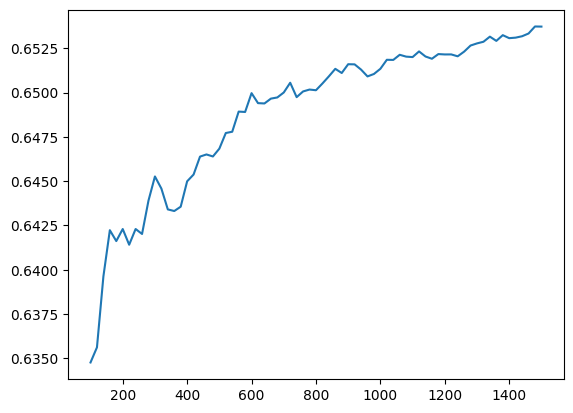

In [18]:
n_estimators=[100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 
420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 
740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000, 1020, 
1040, 1060, 1080, 1100, 1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 
1300, 1320, 1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500]


oob_list=[]

for n in n_estimators:
    model = RandomForestRegressor(oob_score=True, random_state=17, n_estimators=n, max_features= 'log2', min_samples_split=2, min_samples_leaf=1, max_depth=60)
    model.fit(X,y)
    print(n, model.oob_score_)
    oob_list.append(model.oob_score_)

plt.plot(n_estimators, oob_list)